In [56]:
import pandas as pd
from datetime import date

# Read in OSHA file and clean it

In [2]:
df_open = pd.read_csv('Copy_of_Open_Federal_and_State_Plan_Valid_Covid-19_Complaints_through_October_4.xlsx - UPA One Liner Detail.csv')

In [4]:
df_closed= pd.read_csv('Copy_of_Closed_Federal_and_State_Plan_Valid_Covid-19_Complaints_through_October_4.xlsx - UPA One Liner Detail.csv')

In [16]:
df_ct_2 = df_closed[df_closed['Establishment Name\nSite City-State-Zip'].str.contains(r'CONNECTICUT')]

In [19]:
df_ct_2.County.value_counts()

HARTFORD      101
FAIRFIELD      81
NEW HAVEN      63
NEW LONDON     21
WINDHAM        14
TOLLAND        12
LITCHFIELD      9
MIDDLESEX       8
Name: County, dtype: int64

In [113]:
df_ct_2['Industry_code'] = df_ct_2['Primary/Site NAICS'].str.extract(r'(\d\d)')

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [128]:
df_ct_closed_complaints_by_industry = pd.DataFrame(df_ct_2['Industry_code'].value_counts()).reset_index().rename(columns={
    'index':'Code',
    'Industry_code': 'complaints'
})

In [129]:
df_ct_closed_complaints_by_industry.Code = df_ct_closed_complaints_by_industry.Code.astype(int)

In [130]:
df_naisc = pd.read_csv('NAISC.csv')

In [132]:
df_ct_closed_complaints_by_industry.merge(df_naisc).drop(columns='Number of Business Establishments')

,Code,complaints,Industry Title
0,62,84,Health Care and Social Assistance
1,33,32,Manufacturing
2,44,30,Retail Trade
3,49,25,Transportation and Warehousing\t
4,72,19,Accommodation and Food Services
5,45,15,Retail Trade
6,48,14,Transportation and Warehousing
7,23,13,Construction
8,56,12,Administrative and Support and Waste Managemen...
9,54,10,Professional


In [117]:
df_naisc.Code

0     11
1     21
2     22
3     23
4     31
5     32
6     33
7     42
8     44
9     45
10    48
11    49
12    51
13    52
14    53
15    54
16    55
17    56
18    61
19    62
20    71
21    72
22    81
23    92
Name: Code, dtype: int64

In [90]:
len(df_ct_2)

309

In [31]:
df_ct_2['Receipt Date'] = pd.to_datetime(df_ct_2['Receipt Date'])

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_ct_2['weight']=1

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df_complaints_over_time = pd.DataFrame(df_ct_2.groupby(by='Receipt Date').sum()).reset_index().rename(columns={
    'weight': 'Closed Complaints'
})

In [134]:
df_complaints_over_time_by_industry = pd.DataFrame(df_ct_2.groupby(by=['Receipt Date','Industry_code']).sum()).reset_index().rename(columns={
    'weight': 'Closed Complaints'
})

# OSHA over time

In [91]:
#since March

<AxesSubplot:xlabel='Receipt Date'>

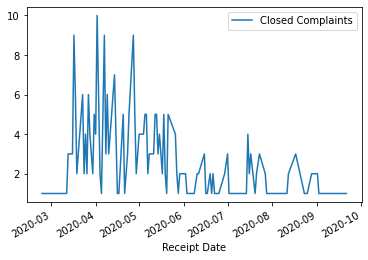

In [55]:
df_complaints_over_time.plot(x='Receipt Date', y='Closed Complaints')

In [ ]:
#healthcare, medical

<AxesSubplot:xlabel='Receipt Date'>

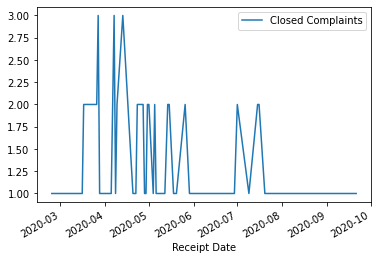

In [135]:
df_complaints_over_time_by_industry[df_complaints_over_time_by_industry['Industry_code']=='62'].plot(x='Receipt Date', y='Closed Complaints')

In [92]:
#since July 1; note the axis starts at 1

<AxesSubplot:xlabel='Receipt Date'>

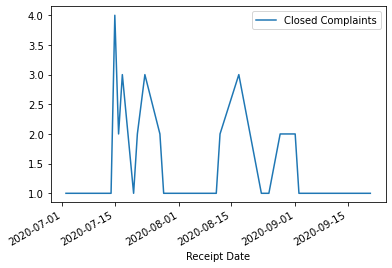

In [60]:
df_complaints_over_time[df_complaints_over_time['Receipt Date']>'2020-07-01'].plot(x='Receipt Date', y='Closed Complaints')

# Deaths over time

In [65]:
df_deaths = pd.read_csv('COVID-19_Tests__Cases__Hospitalizations__and_Deaths__Statewide_ (1).csv')

In [68]:
df_deaths['Date'] = pd.to_datetime(df_deaths['Date'])

In [72]:
df_deaths = df_deaths.sort_values(by='Date')

In [103]:
df_deaths['Total cases each day'] = df_deaths['Total cases'].diff()

In [78]:
df_deaths['Total deaths each day'] = df_deaths['Total deaths'].diff()

In [ ]:
#since March

<AxesSubplot:xlabel='Date'>

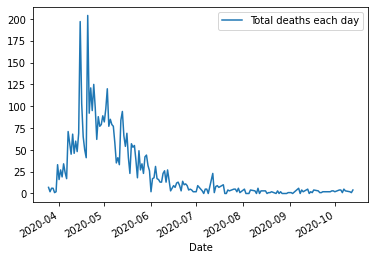

In [79]:
df_deaths.plot(x='Date', y='Total deaths each day')

In [ ]:
#since July 1

<AxesSubplot:xlabel='Date'>

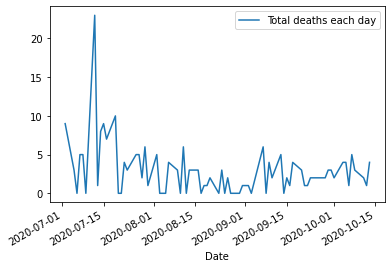

In [80]:
df_deaths[df_deaths['Date']>'2020-07-01'].plot(x='Date', y='Total deaths each day')

# Superimposing the curves

In [81]:
import matplotlib.pyplot as plt

In [ ]:
#since March

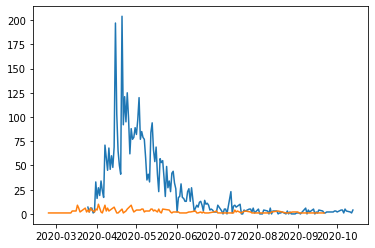

In [84]:
fig,ax = plt.subplots()
ax.plot(df_deaths['Date'], df_deaths['Total deaths each day'])
ax.plot(df_complaints_over_time['Receipt Date'], df_complaints_over_time['Closed Complaints'])

In [ ]:
#since July 1

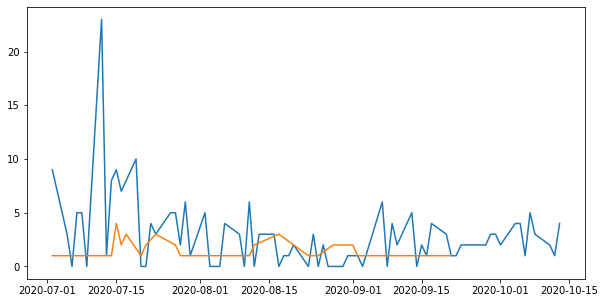

In [95]:
fig,ax = plt.subplots(figsize=(10, 5))
ax.plot(df_deaths[df_deaths['Date']>'2020-07-01']['Date'], df_deaths[df_deaths['Date']>'2020-07-01']['Total deaths each day'])
ax.plot(df_complaints_over_time[df_complaints_over_time['Receipt Date']>'2020-07-01']['Receipt Date'], df_complaints_over_time[df_complaints_over_time['Receipt Date']>'2020-07-01']['Closed Complaints'])

In [ ]:
fig,ax = plt.subplots()
ax.plot(df_deaths[df_deaths['Date']>'2020-07-01']['Date'], df_deaths[df_deaths['Date']>'2020-07-01']['Total deaths each day'])
ax.plot(df_complaints_over_time[df_complaints_over_time['Receipt Date']>'2020-07-01']['Receipt Date'], df_complaints_over_time[df_complaints_over_time['Receipt Date']>'2020-07-01']['Closed Complaints'])

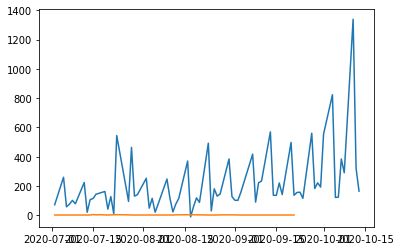

In [104]:
fig,ax = plt.subplots()
ax.plot(df_deaths[df_deaths['Date']>'2020-07-01']['Date'], df_deaths[df_deaths['Date']>'2020-07-01']['Total cases each day'])
ax.plot(df_complaints_over_time[df_complaints_over_time['Receipt Date']>'2020-07-01']['Receipt Date'], df_complaints_over_time[df_complaints_over_time['Receipt Date']>'2020-07-01']['Closed Complaints'])

In [105]:
df_complaints_over_time.to_csv('OSHA_closedcomp_sinceJuly1_CT.csv', index=False)